# Ordinary Differential Equations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy

sympy.init_printing()

In [3]:
t,k, T0, Ta = sympy.symbols("t,k,T_0,T_a")
T = sympy.Function("T")

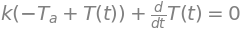

In [6]:
ode = T(t).diff(t)+k*(T(t) - Ta)
sympy.Eq(ode, 0)

In [7]:
ode_sol = sympy.dsolve(ode)
ode_sol

In [8]:
ode_sol.lhs

In [9]:
ode_sol.rhs

In [10]:
ics = {T(0): T0}
ics

In [12]:
C_eq = ode_sol.subs(t,0).subs(ics)
C_eq

In [13]:
C_sol = sympy.solve(C_eq)
C_sol

In [14]:
ode_sol.subs(C_sol[0])

In [15]:
def apply_ics(sol, ics, x, known_params):
    free_params = sol.free_symbols - set(known_params)
    eqs = [(sol.lhs.diff(x,n) - sol.rhs.diff(x,n)).subs(x,0).subs(ics) for n in range(len(ics))]
    sol_params = sympy.solve(eqs, free_params)
    return sol.subs(sol_params)

In [16]:
ode_sol

In [17]:
apply_ics(ode_sol, ics, t, [k,Ta])

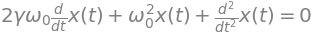

In [18]:
t, omega0, gamma = sympy.symbols("t, omega_0, gamma", positive=True)
x = sympy.Function("x")
ode = x(t).diff(t,2)+2*gamma*omega0*x(t).diff(t)+omega0**2*x(t)
sympy.Eq(ode)

In [19]:
ode_sol = sympy.dsolve(ode)
ode_sol

In [20]:
ics = {x(0):1, x(t).diff(t).subs(t,0):0}
ics

⎧         ⎛d       ⎞│      ⎫
⎨x(0): 1, ⎜──(x(t))⎟│   : 0⎬
⎩         ⎝dt      ⎠│t=0   ⎭

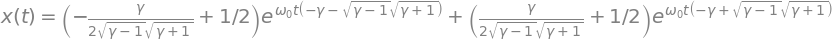

In [21]:
x_t_sol = apply_ics(ode_sol, ics, t, [omega0, gamma])
x_t_sol

In [22]:
x_t_critical = sympy.limit(x_t_sol.rhs, gamma, 1)
x_t_critical

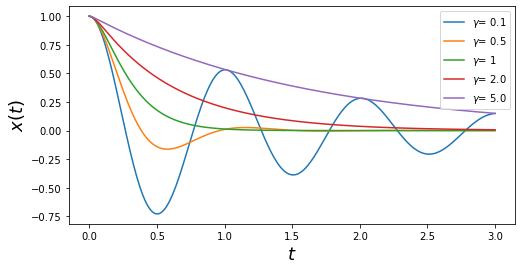

In [24]:
fig, ax = plt.subplots(figsize=(8,4))
tt = np.linspace(0,3,250)
w0 = 2*sympy.pi

for g in [0.1, 0.5, 1, 2.0, 5.0]:
    if g == 1:
        x_t = sympy.lambdify(t, x_t_critical.subs({omega0:w0}), 'numpy')
    else:
        x_t = sympy.lambdify(t, x_t_sol.rhs.subs({omega0:w0, gamma:g}), 'numpy')
    
    ax.plot(tt, x_t(tt).real, label=r"$\gamma$= {}".format(g))
ax.set_xlabel("$t$", fontsize=18)
ax.set_ylabel("$x(t)$", fontsize=18)

ax.legend()
            

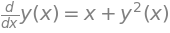

In [25]:
x = sympy.symbols("x")
y = sympy.Function("y")
f = y(x)**2 + x

ode = sympy.Eq(y(x).diff(x), f)
ode

In [26]:
sympy.dsolve(y(x).diff(x)-f)

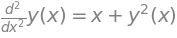

In [27]:
sympy.Eq(y(x).diff(x,x),f)

In [28]:
sympy.dsolve(y(x).diff(x,x)-f)

NotImplementedError: solve: Cannot solve -x - y(x)**2 + Derivative(y(x), (x, 2))

In [31]:
def plot_direction_field(x, y_x, f_xy, x_lim=(-5,5), y_lim=(-5,5), ax = None):
    f_np = sympy.lambdify((x,y_x), f_xy, 'numpy')
    x_vec = np.linspace(x_lim[0], x_lim[1],20)
    y_vec = np.linspace(y_lim[0], y_lim[1], 20)
    
    if ax is None:
        _,ax = plt.subplots(figsize=(4,4))
    
    dx = x_vec[1] - x_vec[0]
    dy = y_vec[1] - y_vec[0]
    
    for m, xx in enumerate(x_vec):
        for n, yy in enumerate(y_vec):
            Dy = f_np(xx,yy)*dx
            Dx = 0.8*dx**2/np.sqrt(dx**2 + Dy**2)
            Dy = 0.8*Dy*dy/np.sqrt(dx**2 + Dy**2)
            ax.plot([xx - Dx/2, xx + Dx/2], [yy-Dy/2, yy+Dy/2], 'b', lw = 0.5)

    ax.axis('tight')
    ax.set_title(r"${}$".format(sympy.latex(sympy.Eq(y(x).diff(x),f_xy))), fontsize=18)

    return ax

<AxesSubplot:title={'center':'$\\frac{d}{d x} y{\\left(x \\right)} = \\frac{y^{2}{\\left(x \\right)}}{x}$'}>

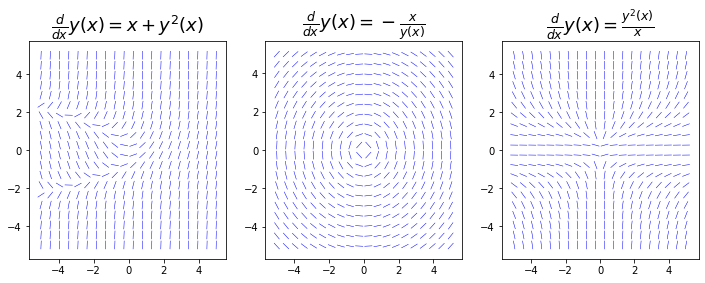

In [32]:
x = sympy.symbols("x")
y = sympy.Function("y")

fig, axes = plt.subplots(1,3,figsize=(12,4))
plot_direction_field(x, y(x), y(x)**2+x, ax = axes[0])
plot_direction_field(x, y(x), -x/y(x), ax = axes[1])
plot_direction_field(x, y(x), y(x)**2/x, ax = axes[2])

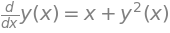

In [33]:
x = sympy.symbols("x")
y = sympy.Function("y")
f = y(x)**2+x
sympy.Eq(y(x).diff(x),f)

In [34]:
ics = {y(0):0}
ode_sol = sympy.dsolve(y(x).diff(x)-f, ics = ics)
ode_sol

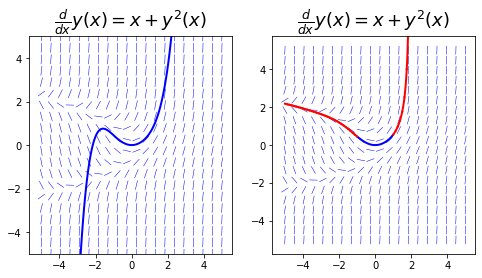

In [40]:
fig, axes = plt.subplots(1,2, figsize=(8,4))

plot_direction_field(x,y(x), f, ax = axes[0])
x_vec = np.linspace(-3,3,100)
axes[0].plot(x_vec, sympy.lambdify(x,ode_sol.rhs.removeO())(x_vec), 'b', lw=2)
axes[0].set_ylim(-5,5)


plot_direction_field(x,y(x), f, ax = axes[1])
x_vec = np.linspace(-1,1,100)
axes[1].plot(x_vec, sympy.lambdify(x,ode_sol.rhs.removeO())(x_vec), 'b', lw=2)
ode_sol_m = ode_sol_p = ode_sol
dx = 0.125

for x0 in np.arange(1,2., dx):
    x_vec = np.linspace(x0, x0+dx, 100)
    ics = {y(x0): ode_sol_p.rhs.removeO().subs(x,x0)}
    ode_sol_p = sympy.dsolve(y(x).diff(x)-f, ics=ics, n=6)
    axes[1].plot(x_vec, sympy.lambdify(x, ode_sol_p.rhs.removeO())(x_vec),'r',lw=2)
    
for x0 in np.arange(-1,-5.,-dx):
    x_vec = np.linspace(x0, x0-dx, 100)
    ics = {y(x0): ode_sol_m.rhs.removeO().subs(x,x0)}
    ode_sol_m = sympy.dsolve(y(x).diff(x)-f, ics=ics, n=6)
    axes[1].plot(x_vec, sympy.lambdify(x, ode_sol_m.rhs.removeO())(x_vec),'r',lw=2)

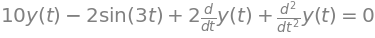

In [42]:
t = sympy.symbols("t", positive=True)
y = sympy.Function("y")
ode = y(t).diff(t,2)+2*y(t).diff(t)+10*y(t)-2*sympy.sin(3*t)
sympy.Eq(ode,0)

In [44]:
s, Y = sympy.symbols("s, Y", real=True)
L_y = sympy.laplace_transform(y(t), t, s)
L_y

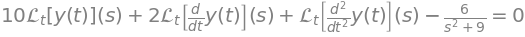

In [46]:
L_ode = sympy.laplace_transform(ode, t, s, noconds=True)
sympy.Eq(L_ode)

In [60]:
def laplace_transform_derivatives(e):
    if isinstance(e, sympy.LaplaceTransform):
        if isinstance(e.args[0], sympy.Derivative):
            d,t,s = e.args
            n = len(d.args)-1
            return ((s**n) * sympy.LaplaceTransform(d.args[0], t, s) - sum([s**(n-i) * sympy.diff(d.args[0], t, i-1). subs(t, 0) for i in range(1, n+1)]))
        
    if isinstance(e, (sympy.Add, sympy.Mul)):
        t = type(e)
        return t(*[laplace_transform_derivatives(arg) for arg in e.args])
        
    return e

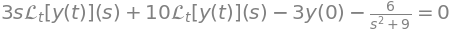

In [61]:
L_ode_2 = laplace_transform_derivatives(L_ode)
sympy.Eq(L_ode_2,0)

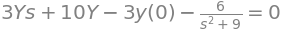

In [62]:
L_ode_3 = L_ode_2.subs(L_y, Y)
sympy.Eq(L_ode_3)

In [64]:
ics = {y(0):1, y(t).diff(t).subs(t,0):0}
ics

⎧         ⎛d       ⎞│      ⎫
⎨y(0): 1, ⎜──(y(t))⎟│   : 0⎬
⎩         ⎝dt      ⎠│t=0   ⎭

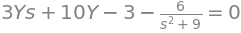

In [65]:
L_ode_4 = L_ode_3.subs(ics)
sympy.Eq(L_ode_4)

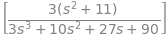

In [66]:
Y_sol = sympy.solve(L_ode_4,Y)
Y_sol

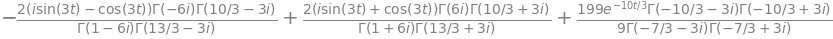

In [68]:
y_sol = sympy.inverse_laplace_transform(Y_sol[0], s, t)
sympy.simplify(y_sol)

In [69]:
x = sympy.symbols("x")
y = sympy.Function("y")
f = y(x)**2+x

In [70]:
f_np = sympy.lambdify((y(x), x), f)

In [72]:
y0 = 0
xp = np.linspace(0,1.9,100)
yp = integrate.odeint(f_np, y0, xp)
xm = np.linspace(0,-5,100)
ym = integrate.odeint(f_np,y0,xm)

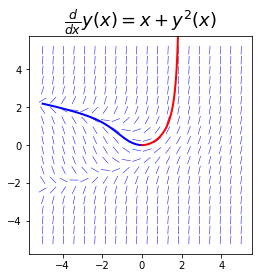

In [73]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
plot_direction_field(x,y(x), f, ax = ax)
ax.plot(xm, ym, 'b', lw=2)
ax.plot(xp,yp,'r',lw=2)

In [111]:
a,b,c,d = 0.4, 0.002, 0.001, 0.7
def f(xy,t):
    x,y = xy
    return [a*x-b*x*y,c*x*y-d*y]

In [112]:
xy0 = [600, 400]
t = np.linspace(0,50,250)
xy_t = integrate.odeint(f, xy0, t)
xy_t.shape

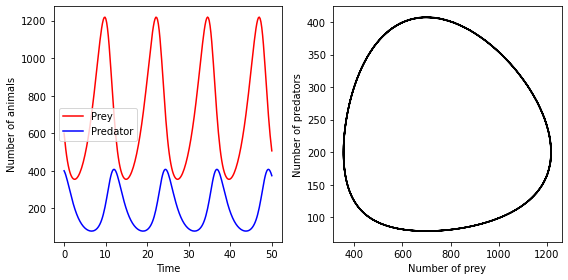

In [113]:
fig, axes = plt.subplots(1,2,figsize=(8,4))
axes[0].plot(t, xy_t[:,0], 'r', label = 'Prey')
axes[0].plot(t, xy_t[:,1], 'b', label = 'Predator')
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Number of animals")
axes[0].legend()
axes[1].plot(xy_t[:,0], xy_t[:,1], 'k')
axes[1].set_xlabel("Number of prey")
axes[1].set_ylabel("Number of predators")
fig.tight_layout()

In [114]:
def f(xyz, t, sigma, rho, beta):
    x,y,z = xyz
    return [sigma*(y-x), x*(rho-z)-y, x*y-beta*z]

In [115]:
sigma, rho, beta = 8, 28, 8/3.
t = np.linspace(0,25,10000)
xyz0 = [1.,1.,1.]

In [116]:
xyz1 = integrate.odeint(f,xyz0,t,args=(sigma, rho, beta))
xyz2 = integrate.odeint(f,xyz0,t,args=(sigma, rho, 0.6*beta))
xyz3 = integrate.odeint(f,xyz0,t,args=(2*sigma, rho, 0.6*beta))

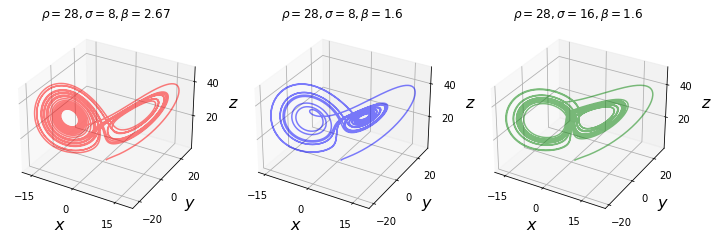

In [117]:
args = [(sigma, rho, beta),(sigma, rho, 0.6*beta),(2*sigma, rho, 0.6*beta)]
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(12,4), subplot_kw={'projection':'3d'})
for ax, xyz, c, arg in [(ax1, xyz1, 'r',args[0]), (ax2, xyz2, 'b',args[1]), (ax3, xyz3, 'g',args[2])]:
    ax.plot(xyz[:,0], xyz[:,1], xyz[:,2], c, alpha=0.5)
    ax.set_xlabel('$x$', fontsize=16)
    ax.set_ylabel('$y$', fontsize=16)
    ax.set_zlabel('$z$', fontsize=16)
    ax.set_xticks([-15, 0, 15])
    ax.set_yticks([-20, 0, 20])
    ax.set_zticks([0, 20, 40])
    ax.set_title(r"$\rho={}, \sigma={}, \beta={} $".format(arg[1],arg[0],round(arg[2],2)))
    

In [124]:
def f(t, y, args):
    m1, k1,g1, m2, k2,g2 = args
    return [y[1], -k1/m1*y[0]+k2/m1*(y[2]-y[0])-
            g1/m1*y[1], y[3], -k2/m2*(y[2]-y[0])-g2/m2*y[3]]

def jac(t, y, args):
    m1, k1,g1, m2, k2,g2 = args
    return [[0,1,0,0],
           [-k1/m2 - k2/m1 - g1/m1*y[1],k2/m1, 0],
           [0,0,1,0],
           [k2/m2,0,-k2/m2, -g2/m2]]

In [125]:
m1, k1, g1 = 1., 10., 0.5
m2,k2,g2 = 2.,40.,0.25
args = (m1, k1, g1, m2, k2, g2)
y0 = [1., 0, 0.5, 0]
t = np.linspace(0,20,1000)

In [120]:
r = integrate.ode(f)

In [126]:
r.set_integrator('lsoda')
r.set_jac_params(args)
r.set_initial_value(y0,t[0])
r.set_f_params(args)

In [127]:
dt = t[1]-t[0]
y = np.zeros((len(t), len(y0)))
idx = 0
while r.successful() and r.t<t[-1]:
    y[idx,:] = r.y
    r.integrate(r.t+dt)
    idx += 1

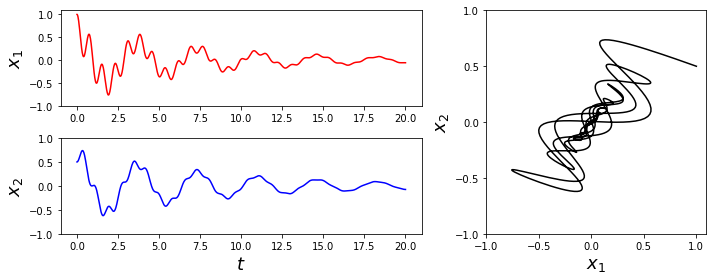

In [128]:
fig = plt.figure(figsize=(10,4))
ax1 = plt.subplot2grid((2,5), (0,0), colspan=3)
ax2 = plt.subplot2grid((2,5), (1,0), colspan=3)
ax3 = plt.subplot2grid((2,5), (0,3), colspan=2, rowspan=2)

ax1.plot(t, y[:,0], 'r')
ax1.set_ylabel('$x_1$', fontsize=18)
ax1.set_yticks([-1,-.5,0,.5,1])

ax2.plot(t, y[:,2], 'b')
ax2.set_xlabel('$t$', fontsize=18)
ax2.set_ylabel('$x_2$', fontsize=18)
ax2.set_yticks([-1,-.5,0,.5,1])

ax3.plot(y[:,0], y[:,2], 'k')
ax3.set_xlabel('$x_1$', fontsize=18)
ax3.set_ylabel('$x_2$', fontsize=18)
ax3.set_xticks([-1,-.5,0,.5,1])
ax3.set_yticks([-1,-.5,0,.5,1])
fig.tight_layout()

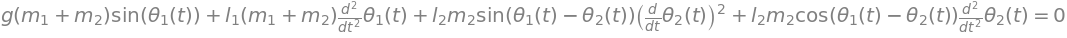

In [133]:
t, g, m1, l1, m2, l2 = sympy.symbols("t,g,m_1, l_1, m_2, l_2")
theta1, theta2 = sympy.symbols("theta_1, theta_2", cls=sympy.Function)
ode1 = sympy.Eq((m1+m2)*l1*theta1(t).diff(t,t)+
                m2*l2*theta2(t).diff(t,t)*sympy.cos(theta1(t)-theta2(t))+
                m2*l2*theta2(t).diff(t)**2*sympy.sin(theta1(t)-theta2(t))+g*(m1+m2)*sympy.sin(theta1(t)),0)
ode1

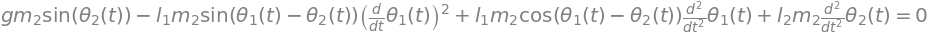

In [135]:
ode2 = sympy.Eq(m2*l2*theta2(t).diff(t,t)+
                m2*l1*theta1(t).diff(t,t)*sympy.cos(theta1(t)-theta2(t))-
                m2*l1*theta1(t).diff(t)**2*sympy.sin(theta1(t)-theta2(t))+g*m2*sympy.sin(theta2(t)),0)
ode2

In [136]:
y1, y2, y3, y4 = sympy.symbols("y_1, y_2, y_3, y_4", cls=sympy.Function)
varchange = {theta1(t).diff(t,t):y2(t).diff(t),
            theta1(t):y1(t),
            theta2(t).diff(t,t):y4(t).diff(t),
            theta2(t):y3(t)}

ode1_vc = ode1.subs(varchange)
ode2_vc = ode2.subs(varchange)

In [137]:
ode3 = y1(t).diff(t)-y2(t)
ode4 = y3(t).diff(t)-y4(t)

In [138]:
y = sympy.Matrix([y1(t), y2(t), y3(t), y4(t)])
vcsol = sympy.solve((ode1_vc, ode2_vc, ode3, ode4), y.diff(t), dict=True)
f = y.diff(t).subs(vcsol[0])

In [139]:
params = {m1:5., l1:2., m2:1., l2:1., g:10.}
_f_np = sympy.lambdify((t,y), f.subs(params), 'numpy')
f_np = lambda _t, _y, *args: _f_np(_t,_y)
jac = sympy.Matrix([[fj.diff(yi) for yi in y] for fj in f])
_jac_np = sympy.lambdify((t,y), jac.subs(params), 'numpy')
jac_np = lambda _t, _y, *args: _jac_np(_t,_y)

In [140]:
y0 = [2., 0, 0, 0]
tt = np.linspace(0,20,1000)
r = integrate.ode(f_np, jac_np).set_initial_value(y0, tt[0])
dt = tt[1]-tt[0]

yy = np.zeros((len(tt), len(y0)))
idx = 0

while r.successful() and r.t <tt[-1]:
    yy[idx,:] = r.y
    r.integrate(r.t+dt)
    idx += 1

In [141]:
theta1_np, theta2_np = yy[:,0], yy[:,2]
x1 = params[l1]*np.sin(theta1_np)
y1 = -params[l1]*np.cos(theta1_np)
x2 = x1 + params[l2]*np.sin(theta2_np)
y2 = y1 - params[l2]*np.cos(theta2_np)

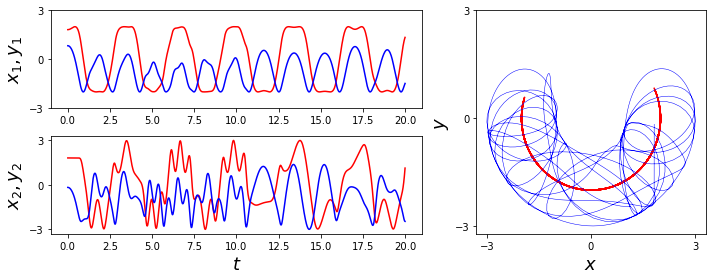

In [148]:
fig = plt.figure(figsize=(10,4))
ax1 = plt.subplot2grid((2,5), (0,0), colspan=3)
ax2 = plt.subplot2grid((2,5), (1,0), colspan=3)
ax3 = plt.subplot2grid((2,5), (0,3), colspan=2, rowspan=2)

ax1.plot(tt,x1,'r')
ax1.plot(tt,y1,'b')
ax1.set_ylabel('$x_1, y_1$', fontsize=18)
ax1.set_yticks([-3,0,3])

ax2.plot(tt,x2,'r')
ax2.plot(tt,y2,'b')
ax2.set_xlabel('$t$', fontsize=18)
ax2.set_ylabel('$x_2, y_2$', fontsize=18)
ax2.set_yticks([-3,0,3])

ax3.plot(x1,y1,'r')
ax3.plot(x2,y2,'b', lw=0.5)
ax3.set_xlabel('$x$', fontsize=18)
ax3.set_ylabel('$y$', fontsize=18)
ax3.set_xticks([-3,0,3])
ax3.set_yticks([-3,0,3])
fig.tight_layout()